## <center> **Predictive Modeling of Employee Attrition Based on Demographic, Professional, and Satisfaction Characteristics**
#### <center> **Directed by  Elauïne BERNARD** 
####  <center> **Statistician, Econometrician / Data scientist** 

### **Context**
Employee attrition, or the rate at which employees leave an organization, is a crucial issue that impacts operational efficiency, financial stability, and overall organizational health. Retaining valuable talent has become increasingly important for companies striving to stay competitive. Predicting which employees are at risk of leaving the company allows businesses to take preemptive action, ensuring high levels of employee satisfaction and reducing turnover costs.

The dataset in use includes a variety of employee-related features such as age, business travel frequency, education, job satisfaction, and distance from home, among others. These attributes will be analyzed to understand patterns and build a predictive model capable of determining which employees are likely to leave the company.

### **Objective**
Build a predictive model that identifies the likelihood of employee attrition based on several features, using Python's machine learning libraries. The model will help HR departments anticipate and mitigate employee turnover.

### **Plan**
1. Data Import and Processing
2. Exploratory Data Analysis
3. Feature Engineering
4. Model Training
5. Model Testing

#### **1- Data Import and processing**

##### Importing packages

In [252]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV

##### Work Directory Definition

In [187]:
Directory=r"C:\Users\berna\Documents\Portfolio\data"
os.chdir(Directory)

##### Importing data

In [190]:
# Source: The dataset was loaded locally from the Kaggle site (https://www.kaggle.com/)
table=pd.read_csv("Employee_Attrition.csv")
table.head(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,11,3,1,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,23,4,4,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,15,3,2,7,3,3,0,0,0,0


##### Basic Information

In [193]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   object
 12  JobSatisfaction           1470 non-null   int64 
 13  MaritalStatus             1470 non-null   object
 14  MonthlyIncome           

The dataset contains 1470 observations and 27 variables.
1. The Attrition variable is the target variable, indicating whether the employee has left the company or not. These variables relate to the personal information of the employee and their life context.
 
2. The variables corresponding to demographic characteristics are: Age, Gender, DistanceFromHome, Education, EducationField, MaritalStatus. 
These variables describe the employee's professional position and working conditions

3. The variables corresponding to professional characteristics are: JobRole, JobLevel, Department, BusinessTravel, MonthlyIncome, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, NumCompaniesWorked, TotalWorkingYears. 
These variables describe the employee's professional position and working conditions

4. The variables related to Satisfaction and Performance are: JobSatisfaction, EnvironmentSatisfaction, JobInvolvement, PerformanceRating, RelationshipSatisfaction, WorkLifeBalance, TrainingTimesLastYear, OverTime, PercentSalaryHike. 
These variables measure the employee's satisfaction, engagement, and performance in their role.

##### Duplicate checking

In [197]:
# Count the number of duplicated 
duplicated_rows=table.duplicated().sum()
print("They are", duplicated_rows, " duplicated rows.")

They are 0  duplicated rows.


##### Missing Values Checking

In [200]:
#Displaying variables with missing values
missing_values=table.isna().sum()
missing_values=missing_values[missing_values>0]
print("They are", len(missing_values), "variable(s) with missing values")

They are 0 variable(s) with missing values


#### **2- Exploratory Data Analysis**

##### Displaying basic descriptive statistics for numerical variables

In [204]:
table.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.729932,2.063946,2.728571,6502.931293,2.693197,15.209524,3.153741,2.712245,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,1.024165,1.093082,0.711561,1.106940,1.102846,4707.956783,2.498009,3.659938,0.360824,1.081209,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,3.000000,4.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


- Age: Employees' age ranges from 18 to 60 years. The average age is 37 years. 75% of employees are under 43 years old.
- DistanceFromHome: The average distance between employees' homes and their workplace is 9 kilometers, with a minimum of 1 km and a maximum of 29 km. 50% of employees live less than 7 km from their workplace.
- Education: Employees' education level is measured on a scale from 1 to 5, where 1 represents a basic education level and 5 represents a very high education level. The average level is 2.91, which corresponds to a university degree. Half of the employees have an education level of 3 or below.
- EnvironmentSatisfaction: Environment satisfaction is measured on a scale from 1 to 4, where 1 represents low satisfaction and 4 represents very high satisfaction. The average is 2.72, and 50% of employees have a satisfaction score of 3 or more.
- JobInvolvement: Job involvement is also measured on a scale from 1 to 4. The average is 2.73, and 50% of employees have a job involvement level of 3 or more.
- JobLevel: Employees' job levels are measured on a scale from 1 to 5, where 1 represents an entry-level position and 5 represents a senior-level position. The average is 2.06, and 75% of employees are at level 3 or below.
- JobSatisfaction: Job satisfaction is measured on a scale from 1 to 4, where 1 represents low satisfaction and 4 represents high satisfaction. The average is 2.73, and 50% of employees have a satisfaction score of 3 or more.
- MonthlyIncome: Monthly income ranges from 1009 to 19999, with an average of 6502. Half of the employees earn less than 4919.
- NumCompaniesWorked: The number of companies employees have worked for ranges from 0 to 9. The average is 2.69, and 75% of employees have worked for 4 companies or fewer.
- PercentSalaryHike: The percentage salary increase is measured on a scale from 11% to 25%, with an average of 15.2%. Half of the employees received a salary increase of 14% or less.
- PerformanceRating: Performance rating is measured on a scale from 3 to 4, where 3 represents good performance and 4 represents exceptional performance. The average is 3.15, with most employees having a rating of 3.
- RelationshipSatisfaction: Relationship satisfaction is measured on a scale from 1 to 4, where 1 represents low satisfaction and 4 represents high satisfaction. The average is 2.71, and 50% of employees rate their relationship satisfaction at 3 or more.
- TotalWorkingYears: The total number of years of professional experience ranges from 0 to 40 years, with an average of 11.28 years. Half of the employees have worked for 10 years or less.
- TrainingTimesLastYear: The number of training sessions attended last year is measured on a scale from 0 to 6, with an average of 2.8. 75% of employees attended 3 or fewer training sessions.
- WorkLifeBalance: Work-life balance is measured on a scale from 1 to 4, where 1 represents poor balance and 4 represents excellent balance. The average is 2.76, and 50% of employees rate their work-life balance at 3 or more.
- YearsAtCompany: The number of years spent at the current company ranges from 0 to 40 years, with an average of 7 years. Half of the employees have spent 5 years or less at the company.
- YearsInCurrentRole: The number of years in the current role ranges from 0 to 18 years, with an average of 4.23 years. 50% of employees have been in their current role for 3 years or more.
- YearsSinceLastPromotion: The number of years since the last promotion ranges from 0 to 15 years, with an average of 2.19 years. 50% of employees have not had a promotion for at least 1 year.
- YearsWithCurrManager: The number of years with the current manager ranges from 0 to 17 years, with an average of 4.12 years. 75% of employees have been with their current manager for 7 years or less.

##### Displaying frequency table for categorical variables

In [208]:
# Select categorical columns
categorical_columns = table.select_dtypes(include='object').columns

# Create a frequency table for each categorical column
for col in categorical_columns:
    print(f"Frequency for the variable '{col}':")
    print(table[col].value_counts(normalize=True))  # Display the frequency table
    print("\n")  # Add space after each table

Frequency for the variable 'Attrition':
Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64


Frequency for the variable 'BusinessTravel':
BusinessTravel
Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: proportion, dtype: float64


Frequency for the variable 'Department':
Department
Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: proportion, dtype: float64


Frequency for the variable 'EducationField':
EducationField
Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
Name: proportion, dtype: float64


Frequency for the variable 'Gender':
Gender
Male      0.6
Female    0.4
Name: proportion, dtype: float64


Frequency for the variable 'JobRole':
JobRole
Sales Executive              0.221769
Research Scientist           0.198639
Laborato

- Attrition:
83.88% of employees did not leave the company, while 16.12% did. This indicates that the majority of employees remain with the company, but there is a significant percentage of attrition to monitor.

- BusinessTravel:
70.95% of employees travel rarely for work.
18.84% travel frequently.
10.20% do not travel at all.
The majority of employees have occasional travel, with only a small portion traveling frequently.

- Department:
65.37% of employees work in the Research and Development department.
30.34% work in Sales.
4.29% work in Human Resources.
The Research and Development department has the largest proportion of employees, followed by Sales.
    
- EducationField:
41.22% of employees studied Life Sciences.
31.56% come from the Medical field.
10.82% have a background in Marketing.
8.98% have a Technical Degree.
5.58% come from other fields, and 1.84% from Human Resources.
Life Sciences and the Medical field dominate the educational background of the employees.
    
- Gender:
60% of employees are male, while 40% are female.
There is a slight predominance of males in the company.

- JobRole:
The three most common roles are Sales Executive (22.18%), Research Scientist (19.86%), and Laboratory Technician (17.62%).
Other less common roles include Manufacturing Director (9.86%) and Healthcare Representative (8.91%).
Management roles (Manager, Research Director) account for about 12% of employees.
The Human Resources role represents a small proportion (3.54%).
                                                                                                                  
- MaritalStatus:
45.78% of employees are married.
31.97% are single.
22.24% are divorced.
Married employees make up the largest proportion, but a significant portion is single or divorced.
    
- OverTime:
71.70% of employees do not work overtime.
28.30% do.
Most employees do not work beyond their regular hours, but a significant portion does work overtime.

##### Analysis correlation between  numerical variables

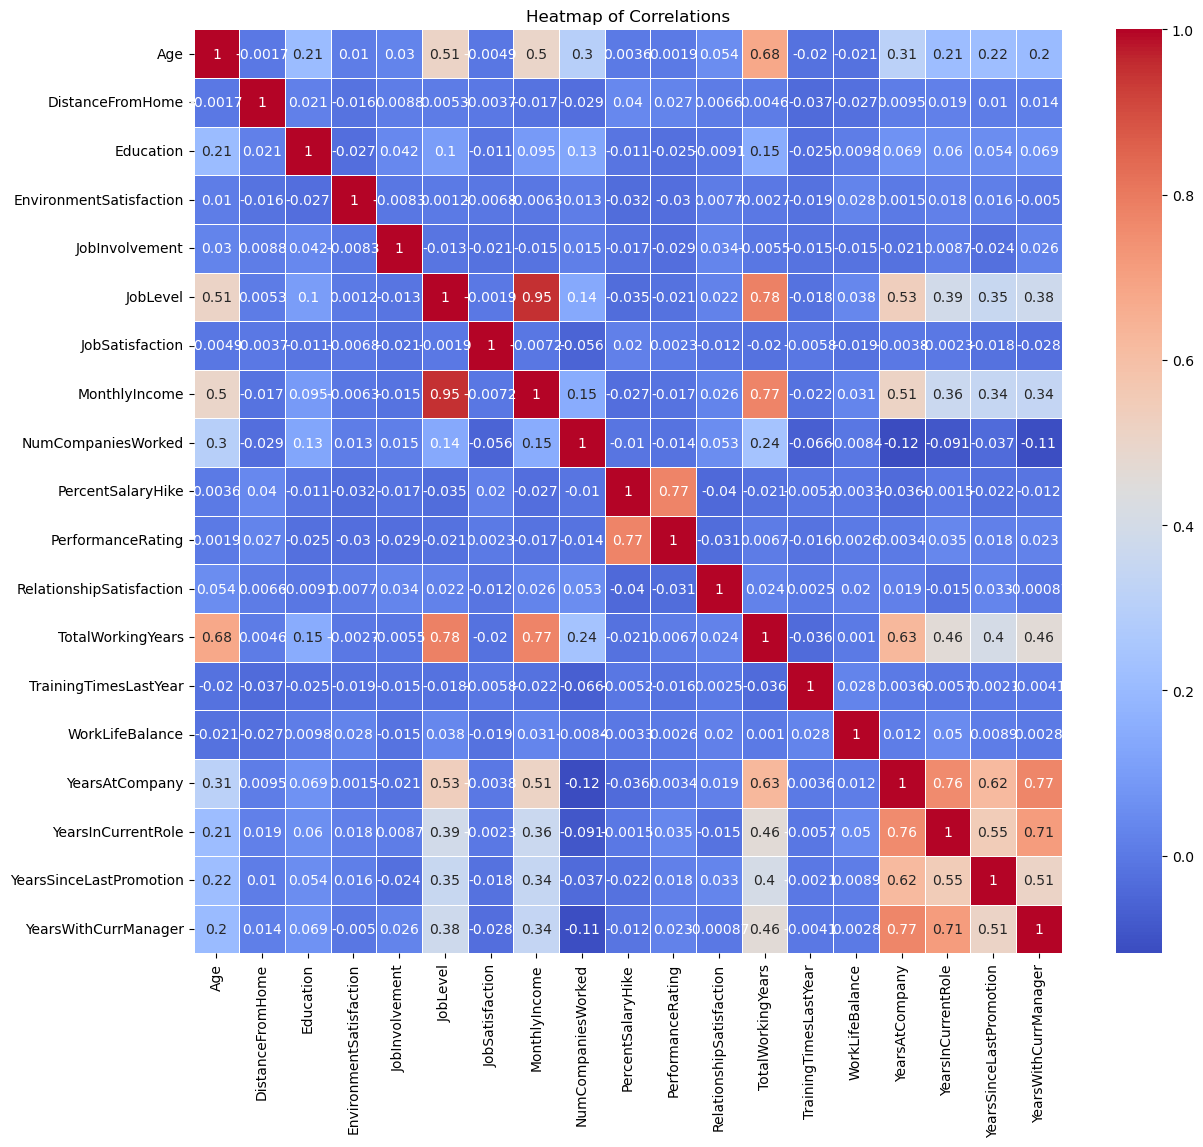

In [212]:
# List of numerical variables to correlate with the target variable
variables_numeriques = table.select_dtypes(include="int").columns

# Calculate correlations between the numerical variables 
correlation_matrix = table[variables_numeriques].corr()

# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlations')
plt.show()

- JobLevel and MonthlyIncome: These variables are highly correlated (0.95). Since they provide similar information, it's better to keep only one. MonthlyIncome is more intuitive for analysis, so JobLevel can be removed.
- TotalWorkingYears and Age: These two variables have a correlation of 0.68. While related, both provide different insights (experience vs. age), so it's recommended to keep both for a comprehensive analysis.
- JobLevel and TotalWorkingYears: With a correlation of 0.78, this further justifies the removal of JobLevel since TotalWorkingYears and MonthlyIncome offer more useful information. TotalWorkingYears should be retained.
- TotalWorkingYears and MonthlyIncome: Despite a strong correlation (0.77), these variables should be kept because they each provide distinct and valuable insights into employee experience and salary.
- PerformanceRating and PercentSalaryHike: These are correlated (0.77), indicating salary increases are related to performance ratings. Since PerformanceRating is more explanatory, PercentSalaryHike can be removed.

In [215]:
# Removing JobLevel and PercentSalaryHike variables from the dataset
table=table.drop(columns=['JobLevel', 'PercentSalaryHike'])
# Check the updated columns
print(table.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PerformanceRating',
       'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


##### Analysis relationship between attrition and numerical variables (Boxplot)

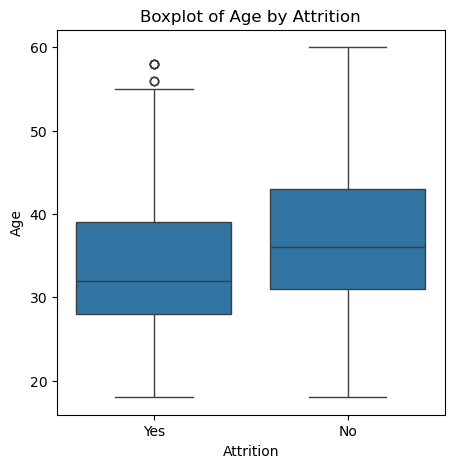

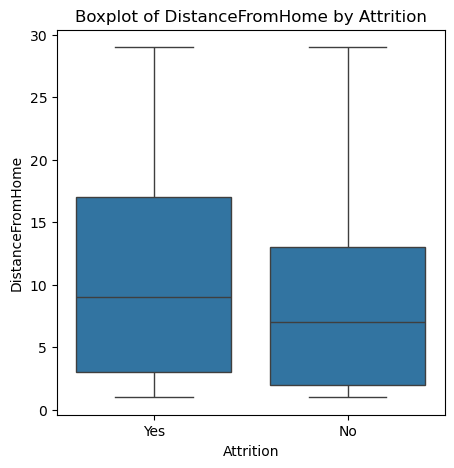

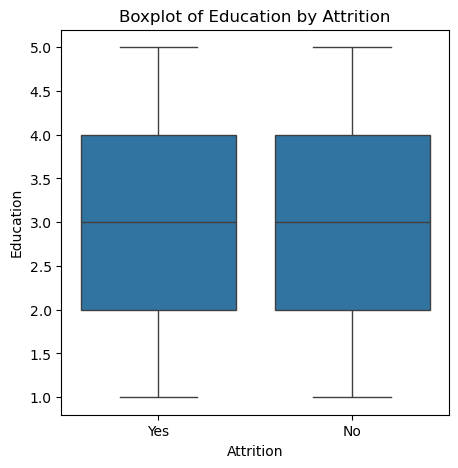

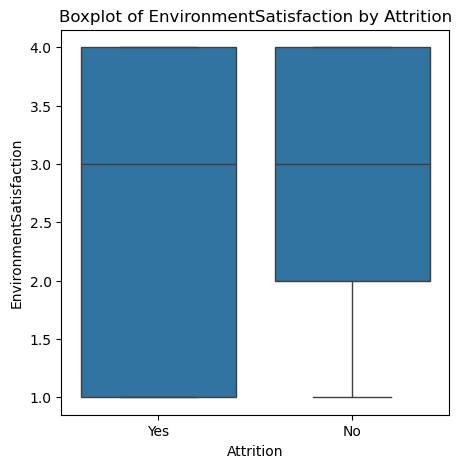

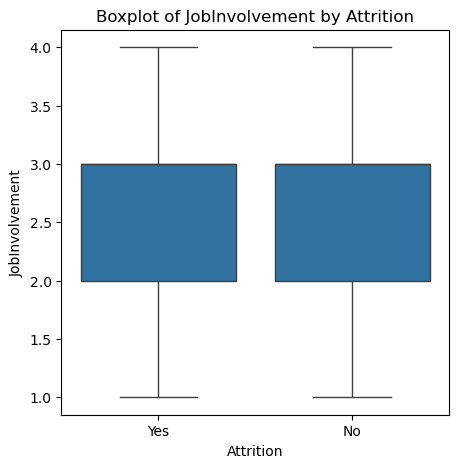

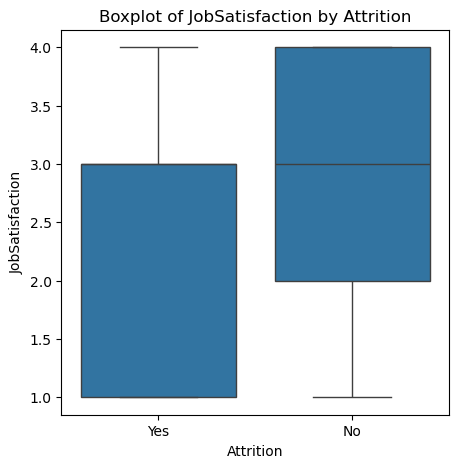

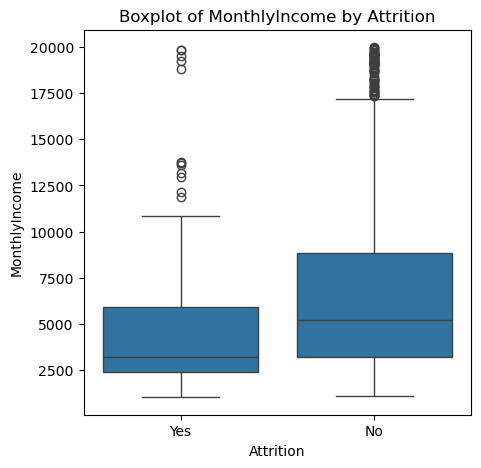

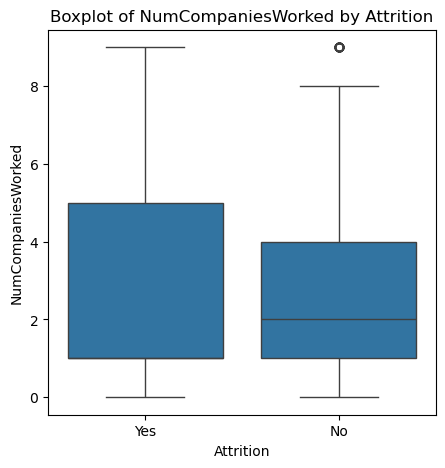

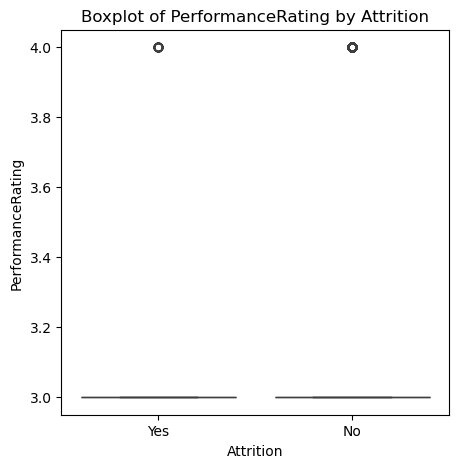

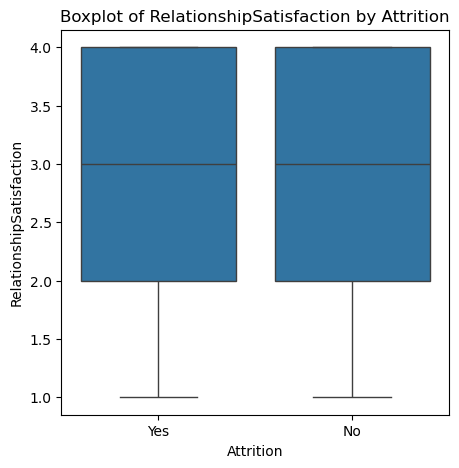

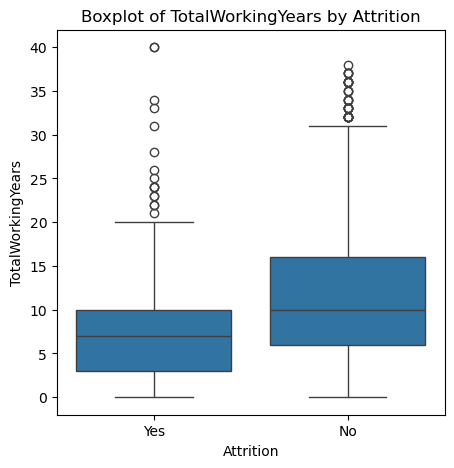

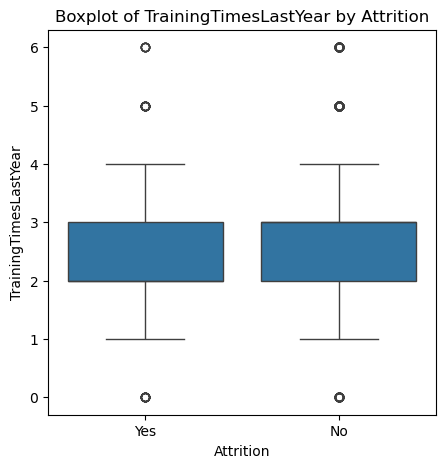

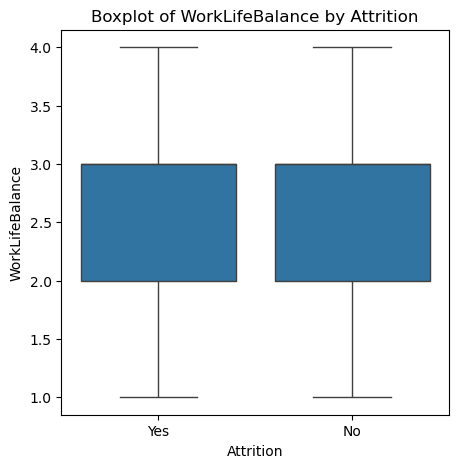

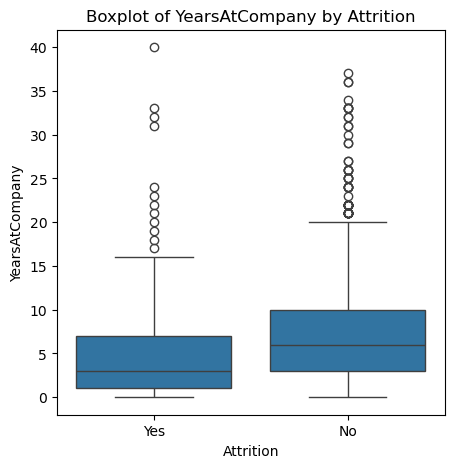

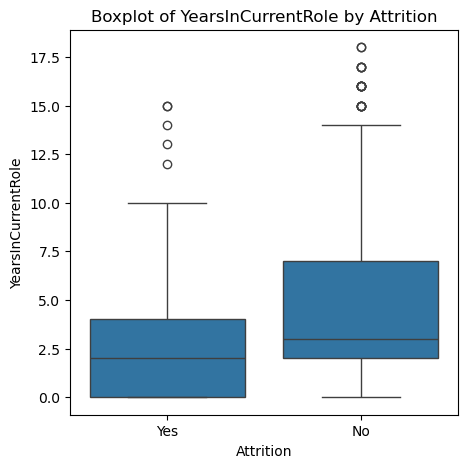

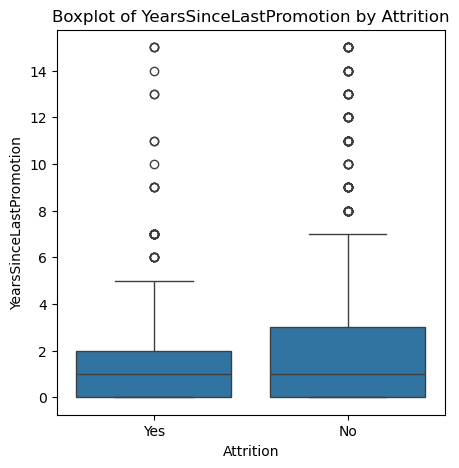

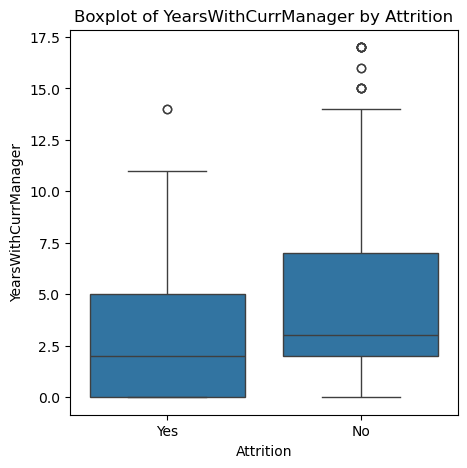

In [218]:
# Get numerical columns
numerical_columns = table.select_dtypes(include=['int64']).columns

# Create boxplots for each numerical variable
for col in numerical_columns:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x='Attrition', y=col, data=table)
    plt.title(f'Boxplot of {col} by Attrition')
    plt.show()

##### Analysis relationship between attrition and numerical variables (t-test)

In [221]:
# Separate the data based on the target variable (Attrition)
group_yes = table[table['Attrition'] == 'Yes']  # Employees who left
group_no = table[table['Attrition'] == 'No']   # Employees who stayed

# Get numerical columns
numerical_columns = table.select_dtypes(include=['int64']).columns

# Loop through the numerical columns
for col in numerical_columns:
    # Perform t-test
    t_stat, p_val = ttest_ind(group_yes[col], group_no[col])
    
    # Display the results
    print(f"Variable: {col}")
    print(f"T-statistic: {t_stat}, P-value: {p_val}\n")

Variable: Age
T-statistic: -6.178663835307217, P-value: 8.356308021103587e-10

Variable: DistanceFromHome
T-statistic: 2.994708098265125, P-value: 0.0027930600802134266

Variable: Education
T-statistic: -1.2026255155085892, P-value: 0.22931520332230415

Variable: EnvironmentSatisfaction
T-statistic: -3.9818600026818496, P-value: 7.172338549368858e-05

Variable: JobInvolvement
T-statistic: -5.024140228583729, P-value: 5.67706535674529e-07

Variable: JobSatisfaction
T-statistic: -3.9862267630568273, P-value: 7.04306674173115e-05

Variable: MonthlyIncome
T-statistic: -6.203935765608938, P-value: 7.147363985353811e-10

Variable: NumCompaniesWorked
T-statistic: 1.6680187953544354, P-value: 0.0955252620565195

Variable: PerformanceRating
T-statistic: 0.11068150493295092, P-value: 0.9118840421069003

Variable: RelationshipSatisfaction
T-statistic: -1.7594250082285654, P-value: 0.07871363048465838

Variable: TotalWorkingYears
T-statistic: -6.6522546135024445, P-value: 4.0618781112668525e-11

V

The t-test results show that variables such as Age, DistanceFromHome, EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, MonthlyIncome, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, and YearsWithCurrManager have a statistically significant relationship with employee attrition (p-value < 0.05), making them strong candidates for the model. In contrast, variables like Education, NumCompaniesWorked, PerformanceRating, RelationshipSatisfaction, and YearsSinceLastPromotion do not show a significant relationship with attrition (p-value > 0.05) and may be less useful for prediction.

We will delete the variables that are not significant.

In [224]:
# Removing the non-significant variables from the table
table = table.drop(columns=['Education', 'NumCompaniesWorked', 'PerformanceRating', 'RelationshipSatisfaction', 'YearsSinceLastPromotion'])
# Check the updated columns
print(table.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'OverTime', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsWithCurrManager'],
      dtype='object')


##### Analysis of the relationship between attrition and categorical variables (Barplot)

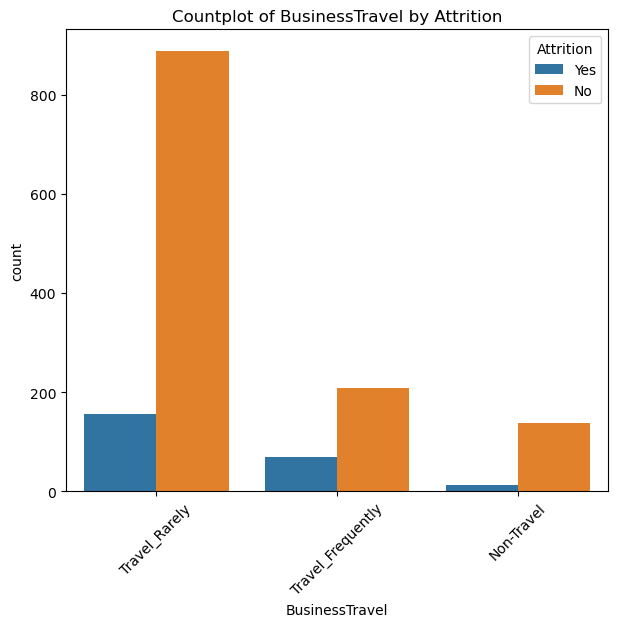

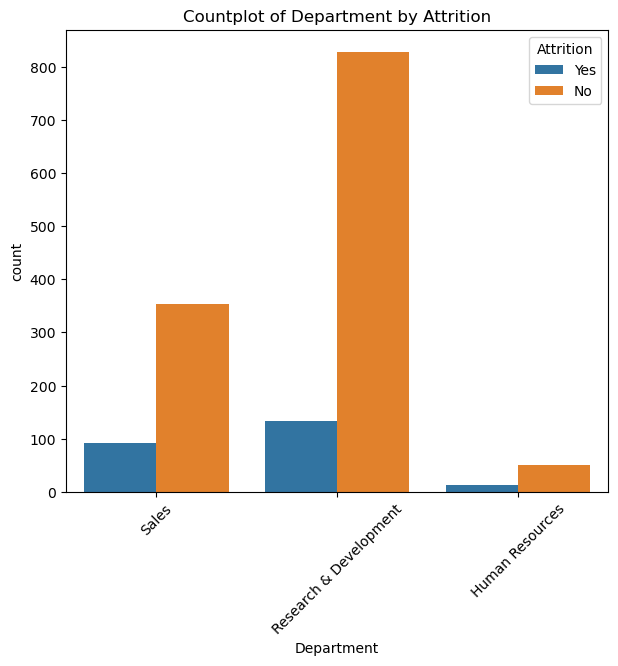

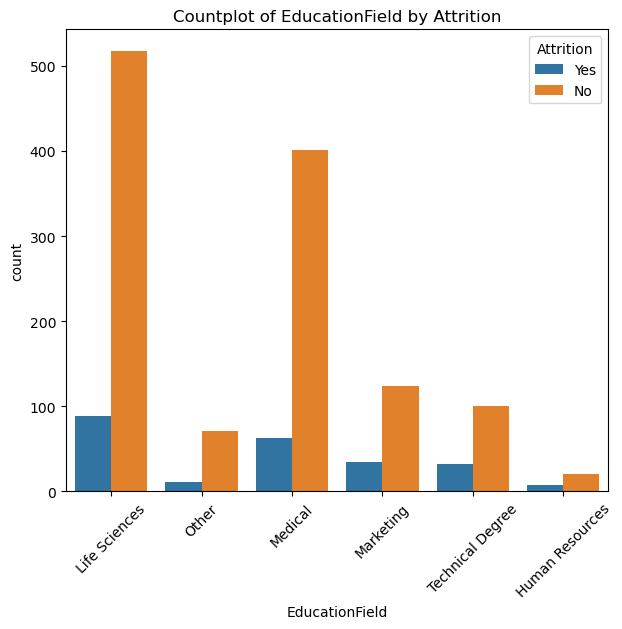

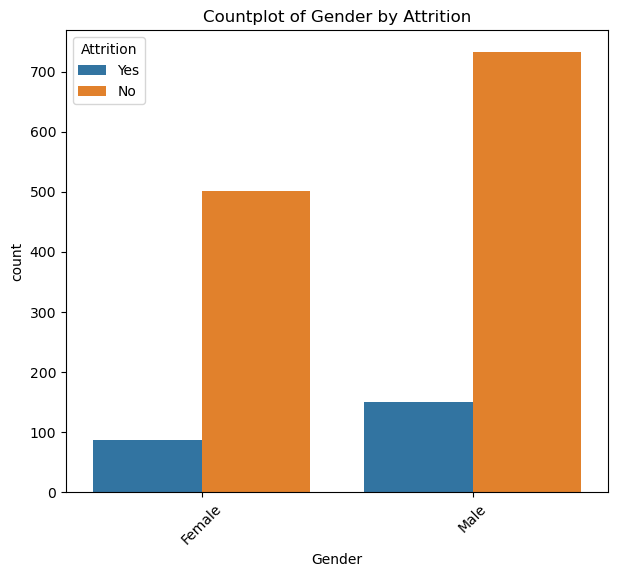

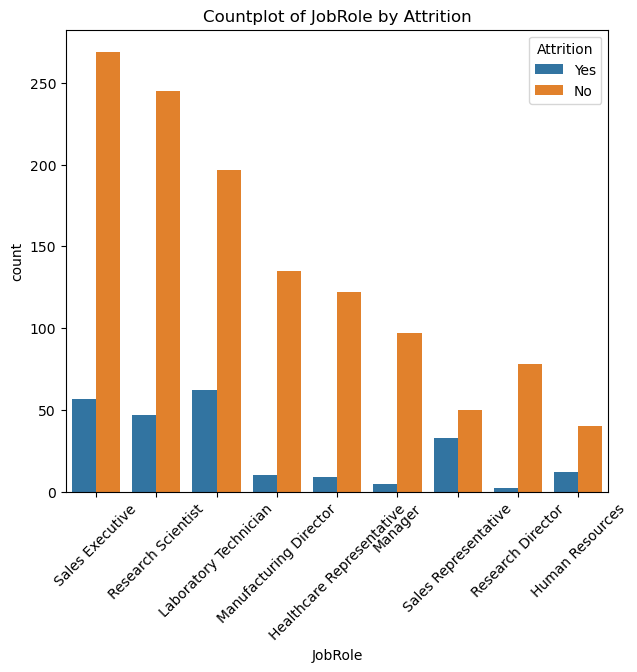

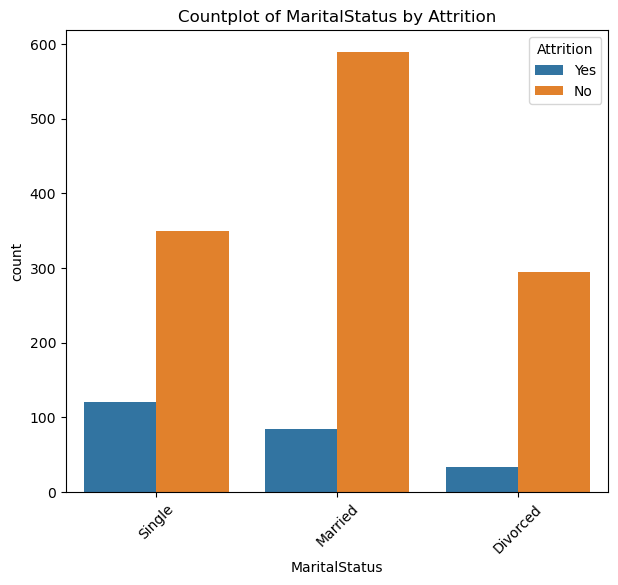

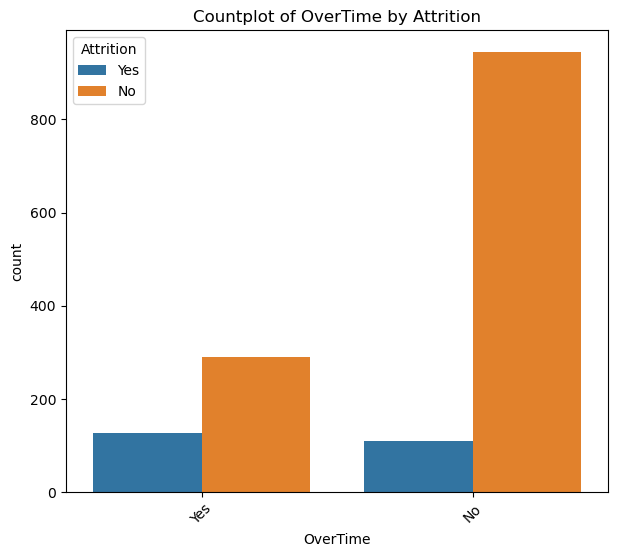

In [227]:
# Get categorical columns
categorical_columns = table.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns.drop('Attrition')  # Exclude 'Attrition' column

# Create countplots for each categorical variable
for col in categorical_columns:
    plt.figure(figsize=(7, 6))
    sns.countplot(x=col, hue='Attrition', data=table)
    plt.title(f'Countplot of {col} by Attrition')
    plt.xticks(rotation=45)
    plt.show()

##### Analysis of the relationship between attrition and categorical variables (chi-2 test)

In [229]:
# Loop over each categorical variable
for col in categorical_columns:
    contingency_table = pd.crosstab(table[col], table['Attrition'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Print results
    print(f"Variable: {col}")
    print(f"Chi-squared: {chi2}, P-value: {p}\n")

Variable: BusinessTravel
Chi-squared: 24.182413685655174, P-value: 5.608614476449931e-06

Variable: Department
Chi-squared: 10.79600732241067, P-value: 0.004525606574479633

Variable: EducationField
Chi-squared: 16.024674119585427, P-value: 0.006773980139025212

Variable: Gender
Chi-squared: 1.1169671241970975, P-value: 0.29057244902890855

Variable: JobRole
Chi-squared: 86.19025367670434, P-value: 2.752481638050657e-15

Variable: MaritalStatus
Chi-squared: 46.163676540848705, P-value: 9.45551106034083e-11

Variable: OverTime
Chi-squared: 87.56429365828768, P-value: 8.15842372153832e-21



The chi-squared test results show that BusinessTravel, Department, EducationField, JobRole, MaritalStatus, and OverTime have a statistically significant relationship with employee attrition (p-value < 0.05), indicating they should be retained for modeling. However, Gender does not show a significant relationship with attrition (p-value > 0.05), suggesting it may not be useful for predicting employee attrition.

In [233]:
# Removing the non-significant variables from the table
table = table.drop(columns=['Gender'])
# Check the updated columns
print(table.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'OverTime', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsWithCurrManager'],
      dtype='object')


#### **3-Feature Engineering**

In [238]:
# Step 1: One-Hot Encoding 
# data for one-hot encoding
data_one_hot = table[['Attrition','Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']]

# One-Hot encoder initialization
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)

# Apply one-hot encoding to columns
onehot_encoded = onehot_encoder.fit_transform(data_one_hot)

# Create a DataFrame with encoded columns
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(['Attrition','Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']))

# Step 2: Ordinal Encoding 
# Data for ordinal encoding (reshaping the series to 2D array)
data_ordored = table[['BusinessTravel']]

# Mappings for ordered variables (should be a list of lists)
ordinal_mappings = [['Non-Travel', 'Travel_Rarely', 'Travel_Frequently']]

# Initialization of ordinal encoder with mappings of defined order
ordinal_encoder = OrdinalEncoder(categories=ordinal_mappings)

# Apply ordinal encoding to columns
ordinal_encoded = ordinal_encoder.fit_transform(data_ordored)

# Create a DataFrame with encoded columns
ordinal_encoded_df = pd.DataFrame(ordinal_encoded, columns=['BusinessTravel'])

# Step 3: Combining dataframes
categorical_df = pd.concat([onehot_encoded_df, ordinal_encoded_df], axis=1)

# dataframe for numerical variables
numeric_df = table.select_dtypes(include=['int64'])

# dataframe for model
final_df = pd.concat([numeric_df, categorical_df], axis=1)
final_df.head(2)

,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,BusinessTravel
0,41,1,2,3,4,5993,8,0,1,6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
1,49,8,3,2,2,5130,10,3,3,10,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0


#### **4-Model Training**

In [240]:
X = final_df.drop(columns=['Attrition_Yes'])
y=final_df['Attrition_Yes']
# Split data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [244]:

# Define the hyperparameters to be tested for each model
param_grid_log_reg = {
    'C': [0.01, 0.1, 1, 10],  # Régularisation
    'solver': ['liblinear', 'lbfgs']
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Model initialization
log_reg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)

# GridSearchCV initialization for each model
grid_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Training models with GridSearchCV
grid_log_reg.fit(X_train, y_train)
grid_knn.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)

# Display the best hyperparameters and the associated score for each model
print(f"Best parameters for Logistic Regression: {grid_log_reg.best_params_}")
print(f"Best accuracy for Logistic Regression: {grid_log_reg.best_score_:.4f}")

print(f"Best parameters for KNN: {grid_knn.best_params_}")
print(f"Best accuracy for KNN: {grid_knn.best_score_:.4f}")

print(f"Best parameters for Random Forest: {grid_rf.best_params_}")
print(f"Best accuracy for Random Forest: {grid_rf.best_score_:.4f}")

Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
Best accuracy for Logistic Regression: 0.8580
Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Best accuracy for KNN: 0.8240
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Best accuracy for Random Forest: 0.8486


In [ ]:
#Training models with the best hyperparameters
log_reg_best = LogisticRegression(C=0.1, solver='liblinear', random_state=42)
log_reg_best.fit(X_train, y_train)

knn_best = KNeighborsClassifier(metric='euclidean', n_neighbors=9, weights='uniform')
knn_best.fit(X_train, y_train)

rf_best = RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=100, random_state=42)
rf_best.fit(X_train, y_train)

#### **5- Model Testing**

In [248]:
# Testing models
# Test set prediction
y_pred_log_reg = log_reg_best.predict(X_test)
y_pred_knn = knn_best.predict(X_test)
y_pred_rf = rf_best.predict(X_test)

# Performance evaluation  (accuracy score)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Displaying results
print(f"Accuracy Logistic Regression on test set: {accuracy_log_reg:.4f}")
print(f"Accuracy KNN on test set: {accuracy_knn:.4f}")
print(f"Accuracy Random Forest on test set: {accuracy_rf:.4f}")

Accuracy Logistic Regression on test set: 0.8980
Accuracy KNN on test set: 0.8639
Accuracy Random Forest on test set: 0.9014


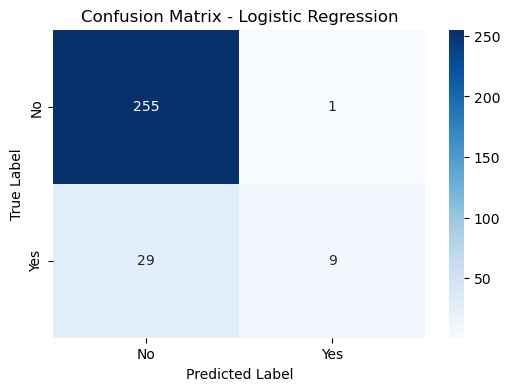

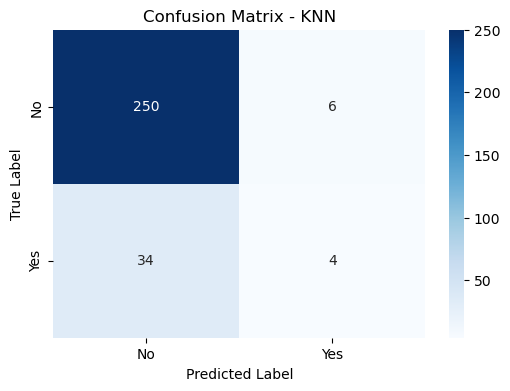

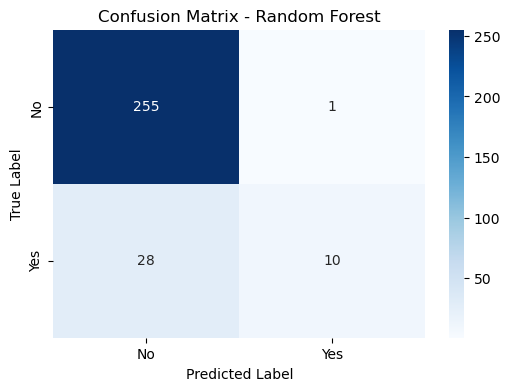

In [254]:
# Function to display the confusion matrix
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f'Confusion Matrix - {title}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Display the confusion matrix for each model
plot_confusion_matrix(y_test, y_pred_log_reg, 'Logistic Regression')
plot_confusion_matrix(y_test, y_pred_knn, 'KNN')
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest')

In view of these results, the **random forest** model seems to be the best for making this prediction. We therefore choose it.